In [1]:
from ourocode.eurocode import EC0_Combinaison
from ourocode.eurocode import A0_Projet
from Pynite import FEModel3D
import pandas as pd

In [2]:
b = 60
h = 140
l = 5000

In [3]:
model = A0_Projet.Model_generator()

n1 = model.add_node(0, 0, 0)
n2 = model.add_node(5000, 0, 0)

section = model.add_section(b, h, 0, "Rectangulaire")
mat = model.add_material_by_class("C24")
m1 = model.add_member(n1, n2, mat, section)
model.add_support(n1)
model.add_support(n2)

pd.DataFrame.from_dict(model.get_all_nodes())


5.000 m


,N1,N2
X,0.000 m,5.000 m
Y,0.000 m,0.000 m
Z,0.000 m,0.000 m
Commentaire,None,None


In [4]:
pd.DataFrame.from_dict(model.get_all_supports())

,S1,S2
Noeud,N1,N2
DX,True,True
DY,True,True
DZ,True,True
RX,True,True
RY,False,False
RZ,False,False
Longueur d'appui,0,0


In [5]:
pd.DataFrame.from_dict(model.get_all_members())

,M1
Noeuds,"[N1, N2]"
Longueur,5.000 m
Section,R60X140
Matériaux,C24
Rotation,0
Relaxation,"{'start': None, 'end': None}"
Commentaire,None


In [6]:

model.create_dist_load(m1, "Permanente", -10, -10, "start", "end", "Permanente G", "FY")
model.create_dist_load(m1, "Exploitation habitation", -10, -5, 20, "75%", "Exploitation Q", "FY")
model.create_point_load(m1, "Neige", -30, "75%", "Neige normale Sn", "FY")
pd.DataFrame.from_dict(model.get_all_loads())

,L1,L2,L3
N° barre,M1,M1,M1
Nom,Permanente,Exploitation habitation,Neige
Action,Permanente G,Exploitation Q,Neige normale Sn
Type de charge,Distribuée,Distribuée,Concentrée
Charge,"{'start': -10.000 kN/m, 'end': -10.000 kN/m}","{'start': -10.000 kN/m, 'end': -5.000 kN/m}",-30.000 kN
Position,"{'start': 0.000 m, 'end': 5.000 m}","{'start': 20.000 mm, 'end': 4 m}",4 m
Axe,FY,FY,FY
Commentaire,None,None,None


In [7]:
combi = EC0_Combinaison.Combinaison(model, cat="Cat A : habitation", ELS_C=True, ELS_QP=True, ELU_STR_ACC=True, type_psy_2="Court terme", kdef=0.6)
combi.get_list_combination()
combi.get_ELU_STR_loads()

11000000000.0
-10000.0
-10000.0


c:\Users\paris\OneDrive\Documents\Project code\ourocode\ourocode\eurocode\EC0_Combinaison.py:1484: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_W_inst_Q.iloc[index, 0] = name_combi


,Combinaison,Index,N° de barre,Nom,Action,Type,Facteur de charge,Charge combinée,Position,Axe
0,ELU_STR 1.35G,L1,M1,Permanente,Permanente G,Distribuée,1.35,"{'start': -13.500 kN/m, 'end': -13.500 kN/m}","{'start': 0.000 m, 'end': 5.000 m}",FY
1,ELU_STR 1.35G + 1.5Q,L1,M1,Permanente,Permanente G,Distribuée,1.35,"{'start': -13.500 kN/m, 'end': -13.500 kN/m}","{'start': 0.000 m, 'end': 5.000 m}",FY
2,ELU_STR 1.35G + 1.5Q,L2,M1,Exploitation habitation,Exploitation Q,Distribuée,1.5,"{'start': -15.000 kN/m, 'end': -7.500 kN/m}","{'start': 20.000 mm, 'end': 4 m}",FY
3,ELU_STR 1.35G + 1.5Q + 0.75Sn,L1,M1,Permanente,Permanente G,Distribuée,1.35,"{'start': -13.500 kN/m, 'end': -13.500 kN/m}","{'start': 0.000 m, 'end': 5.000 m}",FY
4,ELU_STR 1.35G + 1.5Q + 0.75Sn,L2,M1,Exploitation habitation,Exploitation Q,Distribuée,1.5,"{'start': -15.000 kN/m, 'end': -7.500 kN/m}","{'start': 20.000 mm, 'end': 4 m}",FY
5,ELU_STR 1.35G + 1.5Q + 0.75Sn,L3,M1,Neige,Neige normale Sn,Concentrée,0.75,-22.500 kN,4 m,FY
6,ELU_STR 1.35G + 1.5Sn,L1,M1,Permanente,Permanente G,Distribuée,1.35,"{'start': -13.500 kN/m, 'end': -13.500 kN/m}","{'start': 0.000 m, 'end': 5.000 m}",FY
7,ELU_STR 1.35G + 1.5Sn,L3,M1,Neige,Neige normale Sn,Concentrée,1.5,-45.000 kN,4 m,FY
8,ELU_STR 1.35G + 1.5Sn + 1.05Q,L1,M1,Permanente,Permanente G,Distribuée,1.35,"{'start': -13.500 kN/m, 'end': -13.500 kN/m}","{'start': 0.000 m, 'end': 5.000 m}",FY
9,ELU_STR 1.35G + 1.5Sn + 1.05Q,L2,M1,Exploitation habitation,Exploitation Q,Distribuée,1.05,"{'start': -10.500 kN/m, 'end': -5.250 kN/m}","{'start': 20.000 mm, 'end': 4 m}",FY


In [8]:
model._model.load_cases

['G', 'Q', 'Sn']

In [9]:
combi.analize_FEM_model("Général")

In [10]:
pd.DataFrame.from_dict(model.get_min_max_internal_force(m1, "ELU_STR 1.35G + 1.5Sn + 1.05Q"))

,Nx,Vy,Vz,Mx,My,Mz
Min,0.000 N,-77.357 kN,0.000 N,0.000 N·m,-0.000 N·m,-92.414 kN·m
Max,0.000 N,64.517 kN,0.000 N,0.000 N·m,-0.000 N·m,0.000 N·m


In [11]:
pd.DataFrame.from_dict(model.get_min_max_deflection(m1, "ELU_STR 1.35G + 1.5Sn + 1.05Q"))

,dx,dy,dz
Min,0.000 m,-874.099 μm,0.000 m
Max,0.000 m,416.334 zm,0.000 m


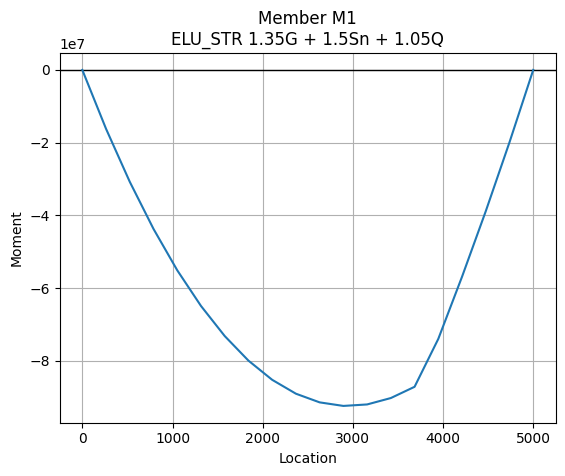

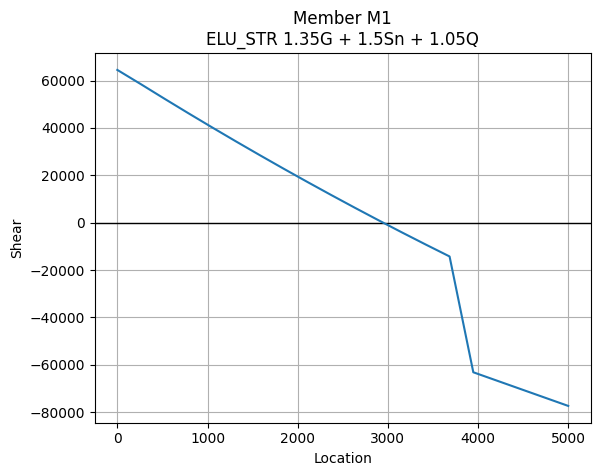

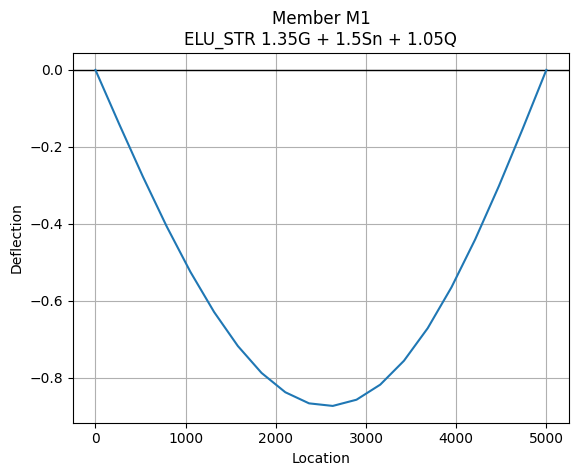

In [12]:
model._model.members[m1].plot_moment(Direction="Mz", combo_name="ELU_STR 1.35G + 1.5Sn + 1.05Q")
model._model.members[m1].plot_shear(Direction="Fy", combo_name="ELU_STR 1.35G + 1.5Sn + 1.05Q")
model._model.members[m1].plot_deflection(Direction="dy", combo_name="ELU_STR 1.35G + 1.5Sn + 1.05Q")